## KNN: k-nearest neighbors.



This dataset seems suitable for exploring potential relationships between these factors and the likelihood of a fraudulent claim. For example, you might investigate if younger males with larger engines who haven't made a claim recently are more likely to file fraudulent claims.

* **age:** The age of the insurance policyholder.
* **is_male:** A binary indicator of the policyholder's gender (1 for male, 0 for not male).
* **engine_size:**  The size of the engine in the insured vehicle (the units are not specified but could be cubic centimeters or liters).
* **months_last_claim:** The number of months since the policyholder's last claim.
* **fraud:** A binary indicator of whether the claim was fraudulent (1 for fraudulent, 0 for not fraudulent).
"""


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/ML315/refs/heads/main/datasets/car_insurance_fraud.csv')
df.head()


,age,is_male,engine_size,months_last_claim,fraud
0,71,0,120,24,1
1,40,0,70,12,1
2,78,0,200,12,0
3,31,1,120,6,1
4,32,1,120,12,0


A train-test split divides data to train and evaluate a model on unseen data, preventing overfitting and providing a better measure of generalization. Random splitting, maintaining data distribution, and stratified sampling (for imbalanced data) are important considerations.

![](https://images.shiksha.com/mediadata/ugcDocuments/images/wordpressImages/2022_12_MicrosoftTeams-image-6.jpg)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','is_male','engine_size','months_last_claim']],df_scaled['fraud'] ,test_size=0.20)
X_train.head(3)

,age,is_male,engine_size,months_last_claim
6,53,0,70,6
30,20,1,200,24
61,87,1,70,6


 K-Nearest Neighbors (KNN) is a simple supervised learning algorithm for classification and regression. It classifies or predicts a new data point based on the majority class or average value of its k nearest neighbors in the training data. The process involves choosing k, calculating distances to all training points, finding the k closest, and assigning the most frequent class (classification) or average value (regression). Key considerations include the choice of k, the distance metric, and feature scaling, as these factors impact performance. While intuitive, KNN can be computationally expensive with large datasets.

![](https://miro.medium.com/v2/resize:fit:1400/1*R9P-psALmaTA8r0s9dNECQ.gif)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
train_accuracy= knn.score(X_train,y_train)*100
print(train_accuracy)

76.25


 We can calculate accuracy by dividing the number of correct predictions by the total number of predictions.


In [ ]:
preds=knn.predict(X_test)
preds

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1.])

In [ ]:
y_test.head(3)

,fraud
55,1.0
40,0.0
50,1.0


In [ ]:
y_test==preds
sum(y_test==preds)/len(preds)

0.6

In [ ]:
from sklearn.metrics import accuracy_score
preds = knn.predict(X_test)
test_accuracy = accuracy_score(y_test,preds)*100
test_accuracy

60.0

A confusion matrix is a table that summarizes the performance of a classification model on a set of test data. It shows how many times the model correctly predicted each class and how many times it made incorrect predictions

![](https://pbs.twimg.com/media/G3OWo5FWUAEojKR?format=png&name=small)


[[9 1]
 [7 3]]


<Axes: >

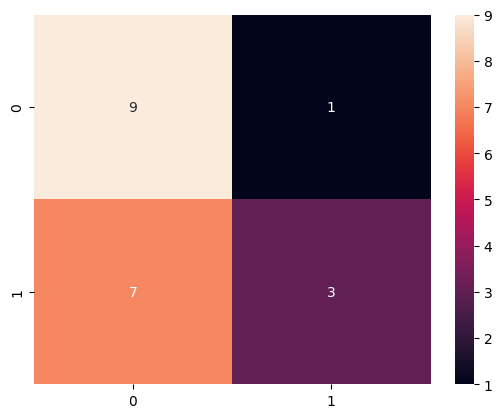

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")

 Precision and recall are two important metrics used to evaluate the performance of a classification model. They are particularly useful when dealing with imbalanced datasets.

- Precision measures the proportion of positive identifications that were actually correct. In other words, it tells us how accurate the positive predictions are.

- Recall measures the proportion of actual positive cases that were correctly identified. It tells us how well the model finds all the relevant cases.

![](https://pbs.twimg.com/media/G3OWrR4XEAA1p4X?format=png&name=small)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.56      0.90      0.69        10
         1.0       0.75      0.30      0.43        10

    accuracy                           0.60        20
   macro avg       0.66      0.60      0.56        20
weighted avg       0.66      0.60      0.56        20

